In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [38]:
print(torch.ones(2, 7))
1e+0

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])


1.0

## Concatenation

In [7]:
torch.cat([
    torch.rand(5, 2),
    torch.rand(5, 3),
], dim=1)

tensor([[0.5675, 0.5039, 0.4418, 0.1629, 0.3112],
        [0.8141, 0.6419, 0.3275, 0.4045, 0.1408],
        [0.4744, 0.1197, 0.9998, 0.0170, 0.7158],
        [0.5859, 0.9107, 0.8488, 0.5436, 0.5333],
        [0.1011, 0.6708, 0.9191, 0.3524, 0.9563]])

In [8]:
torch.stack([
    torch.rand(5),
    torch.rand(5)
])

tensor([[0.3274, 0.1722, 0.4212, 0.7676, 0.8764],
        [0.7686, 0.4081, 0.1553, 0.3131, 0.0148]])

In [9]:
x = torch.ones(5)

F.pad(x, (1, 3), value=0)

tensor([0., 1., 1., 1., 1., 1., 0., 0., 0.])

In [10]:
x = torch.ones(5,3)

F.pad(x, (0, 0, 0, 3), value=0)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

## Repetition

In [11]:
a = torch.randn(2,3)
a.repeat(1, 1)

tensor([[ 0.9646,  1.0293, -0.6468],
        [ 0.7897,  0.9707,  1.1779]])

In [12]:
a.repeat(3, 1, 1)

tensor([[[ 0.9646,  1.0293, -0.6468],
         [ 0.7897,  0.9707,  1.1779]],

        [[ 0.9646,  1.0293, -0.6468],
         [ 0.7897,  0.9707,  1.1779]],

        [[ 0.9646,  1.0293, -0.6468],
         [ 0.7897,  0.9707,  1.1779]]])

## Randoms

In [13]:
torch.randint(0, 2, size=[5])

tensor([0, 1, 0, 0, 0])

In [14]:
np.random.choice(40, 5, replace=False)

array([16, 28, 35, 36, 30])

## Matmul

### MultiOp * batch of vectors 

In [15]:
B = 5
N_ops, d_in, d_out = 3, 8, 4

WW = torch.zeros(N_ops, d_in, d_out)
WW[0, range(d_out), range(d_out)] = 1
WW[1, range(d_out), range(d_out)] = 2
WW[2, range(d_out), range(d_out)] = 3

WW

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[2., 0., 0., 0.],
         [0., 2., 0., 0.],
         [0., 0., 2., 0.],
         [0., 0., 0., 2.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[3., 0., 0., 0.],
         [0., 3., 0., 0.],
         [0., 0., 3., 0.],
         [0., 0., 0., 3.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [16]:
X_input = torch.ones(B, d_in)
X_input

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
torch.matmul(
    X_input,  # [B, d_in]
    WW        # [N_ops, d_in, d_out]
).transpose(0, 1) # [B, N_ops, d_out]

tensor([[[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.]]])

### Operator per vector in batch

In [18]:
B = N_ops
X_input = torch.ones(B, d_in)
X_input

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [19]:
torch.matmul(
    X_input.unsqueeze(1), 
    WW
).squeeze(1)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

### Vectors dot product per vector in batch

In [20]:
WW = torch.zeros(N_ops, d_in)
WW[0, :] = 1
WW[1, :] = 2
WW[2, :] = 3

WW

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3.]])

In [25]:
X_input = torch.ones(B, 2, d_in)
X_input

tensor([[[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]]])

In [30]:
torch.matmul(
    X_input, 
    WW.unsqueeze(2)
).shape

torch.Size([3, 2, 1])

## Misc

In [195]:
t, _ = torch.max(torch.ones(2,3,5), torch.rand(2,3,5)+.5)
t

tensor([[1.2926, 1.0000, 1.0000, 1.3878, 1.1070],
        [1.1045, 1.2851, 1.3022, 1.0000, 1.0170],
        [1.1913, 1.3129, 1.2207, 1.0000, 1.3773]])

In [211]:
a = torch.rand(2, 1 ,5)
a

tensor([[[0.1551, 0.9172, 0.9931, 0.6603, 0.2963]],

        [[0.3798, 0.2434, 0.7848, 0.7287, 0.1547]]])

In [214]:
torch.ones(6, 5) * a

tensor([[[0.1551, 0.9172, 0.9931, 0.6603, 0.2963],
         [0.1551, 0.9172, 0.9931, 0.6603, 0.2963],
         [0.1551, 0.9172, 0.9931, 0.6603, 0.2963],
         [0.1551, 0.9172, 0.9931, 0.6603, 0.2963],
         [0.1551, 0.9172, 0.9931, 0.6603, 0.2963],
         [0.1551, 0.9172, 0.9931, 0.6603, 0.2963]],

        [[0.3798, 0.2434, 0.7848, 0.7287, 0.1547],
         [0.3798, 0.2434, 0.7848, 0.7287, 0.1547],
         [0.3798, 0.2434, 0.7848, 0.7287, 0.1547],
         [0.3798, 0.2434, 0.7848, 0.7287, 0.1547],
         [0.3798, 0.2434, 0.7848, 0.7287, 0.1547],
         [0.3798, 0.2434, 0.7848, 0.7287, 0.1547]]])

# Experiments

In [140]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

class SimpleModel(nn.Module):
    
    def __init__(self, d, N_t, h=200):
        super().__init__()
        self.W1 = nn.Linear(d, h)
        self.W2 = nn.Linear(h, 2)
        self.E = nn.Embedding(N_t, d)
        self.layer_norm = nn.LayerNorm(h)
        
    def forward(self, x, x_tokens):
        x_t_embed = self.E(x_tokens)  # [B, 5, d]
        x_t_embed = x_t_embed.sum(axis=1)
        
        x_t = self.W1(x_t_embed)
        
        x = self.W1(x) + x_t
        x = self.layer_norm(x)
        
        x = F.relu(x)
        x = self.W2(x)
        return x

    
N = 100
N_t = 10
d = 10

X = torch.rand(N, d)
X_tokens = torch.randint(N_t, size=[N, 5])
y = torch.randint(0, 2, size=[N])



####
writer = SummaryWriter(f'runs/tests/run-{datetime.now().strftime("%H-%M-%S")}')

model = SimpleModel(d, N_t)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

losses = []
for i in range(1000):
    batch_idxs = np.random.choice(N, 50, replace=False)
    X_batch = X[batch_idxs, :]
    X_t_batch = X_tokens[batch_idxs, :]
    y_batch = y[batch_idxs]
    
    optimizer.zero_grad()
    
    logits = model(X_batch, X_t_batch)
    loss = loss_fn(logits, y_batch)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if i % 100 == 0:
        writer.add_scalar('Loss/train', loss.item(), i)
        for tag, parm in model.named_parameters():
            writer.add_histogram(tag, parm.grad.data.cpu().numpy(), i)

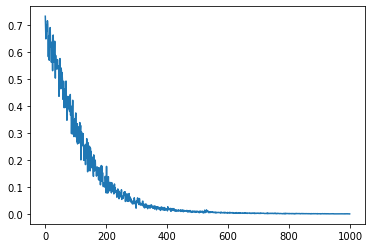

In [141]:
plt.plot(losses);

## Datasets

In [209]:
class MyDataset(torch.utils.data.Dataset):
    
    def __init__(self, samples):
        self.samples = samples
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, i):
        y = torch.rand(7, 3)
        return {
            'x': self.samples[i],
            'y': {
                'yy': y,
                'zz': y
            }
        }
        
        
X = torch.rand(10, 5)
ds = MyDataset(X)

# next(iter(torch.utils.data.DataLoader(ds, batch_size=3)))